In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint 
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import LSTM
from keras.layers import Dense
from sklearn. preprocessing import StandardScaler


In [129]:
df=pd.read_csv('reduce_hourly.csv')
df
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.drop(['datetime'], axis=1)
train_dates =pd.to_datetime(df['Datetime'])
train_dates
cols=list(df)[4]

In [130]:
cols=np.array(cols)
df_for_training=df[cols].astype(float)
df_for_training.values.reshape(-1,1) 
#This extracts a numpy array with the values of your pandas Series object and then reshapes it to a 2D array.

#The reason you need to do this is that pandas Series objects are by design one dimensional.
#Another solution if you would like to stay within the pandas library would be to convert the Series
#to a DataFrame which would then be 2D:

array([[  5760.],
       [ 11520.],
       [ 15360.],
       ...,
       [856320.],
       [837120.],
       [606720.]])

In [131]:
#for scaling the value 

scaler=StandardScaler()
scaler=scaler.fit(df_for_training.values.reshape(-1,1))
df_for_training_scaled=scaler.transform(df_for_training.values.reshape(-1,1))

In [132]:
len(df_for_training_scaled)

8760

In [137]:
trainX=[]
trainY=[]
# I wanna see 2 week behind so that 15th value is my prediction 
n_future=1
n_past=14
def df_to_xy(df,window_size=14):
    df_as_np= df.to_numpy()
    X=[]
    Y=[]
    for i in range(len(df_as_np)-window_size):
        row=[[a] for a in df_as_np[i:i+14]]
        X.append(row)
        label=df_as_np[i+14]
        Y.append(label)
    return np.array(X), np.array(Y)
X,Y=df_to_xy(pd.DataFrame(df_for_training_scaled),n_past)
trainX=X
trainY=Y

'''for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])'''

'for i in range(n_past, len(df_for_training_scaled) - n_future +1):\n    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])\n    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])'

In [138]:
trainX,trainY=np.array(trainX),np.array(trainY)
trainX
print('trainX shape=={}'.format(trainX.shape))
print('trainY shape=={}'.format(trainY.shape))
trainX=np.squeeze(trainX)
trainX.shape
trainX=np.expand_dims(trainX, axis=2)
trainX.shape

trainX shape==(8746, 14, 1, 1)
trainY shape==(8746, 1)


(8746, 14, 1)

In [139]:
trainX

array([[[-1.88113758],
        [-1.86348116],
        [-1.85171021],
        ...,
        [-0.57456258],
        [-0.06252643],
        [ 0.31414384]],

       [[-1.86348116],
        [-1.85171021],
        [-1.79874095],
        ...,
        [-0.06252643],
        [ 0.31414384],
        [ 0.0610685 ]],

       [[-1.85171021],
        [-1.79874095],
        [-1.82816832],
        ...,
        [ 0.31414384],
        [ 0.0610685 ],
        [ 0.21997627]],

       ...,

       [[-1.13368251],
        [-1.28081933],
        [-1.11014062],
        ...,
        [ 0.91446208],
        [ 0.77321073],
        [ 0.78498167]],

       [[-1.28081933],
        [-1.11014062],
        [-0.78055413],
        ...,
        [ 0.77321073],
        [ 0.78498167],
        [ 0.72612694]],

       [[-1.11014062],
        [-0.78055413],
        [-0.36857103],
        ...,
        [ 0.78498167],
        [ 0.72612694],
        [ 0.66727222]]])

In [140]:
from keras.layers import Dropout
model=Sequential()
model.add(LSTM(64,activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32,activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 14, 64)            16896     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [141]:
history=model.fit(trainX, trainY, epochs=28,batch_size=16 , validation_split=0.1,verbose=1)

Epoch 1/28
492/492 [==============================] - 5s 6ms/step - loss: 0.2011 - val_loss: 0.0781
Epoch 2/28
492/492 [==============================] - 3s 6ms/step - loss: 0.0917 - val_loss: 0.0613
Epoch 3/28
492/492 [==============================] - 3s 6ms/step - loss: 0.0810 - val_loss: 0.0571
Epoch 4/28
492/492 [==============================] - 3s 6ms/step - loss: 0.0775 - val_loss: 0.0491
Epoch 5/28
492/492 [==============================] - 3s 6ms/step - loss: 0.0738 - val_loss: 0.0543
Epoch 6/28
492/492 [==============================] - 3s 6ms/step - loss: 0.0727 - val_loss: 0.0522
Epoch 7/28
492/492 [==============================] - 3s 6ms/step - loss: 0.0732 - val_loss: 0.0483
Epoch 8/28
492/492 [==============================] - 3s 6ms/step - loss: 0.0696 - val_loss: 0.0497
Epoch 9/28
492/492 [==============================] - 3s 6ms/step - loss: 0.0703 - val_loss: 0.0493
Epoch 10/28
492/492 [==============================] - 3s 6ms/step - loss: 0.0689 - val_loss: 0.0472

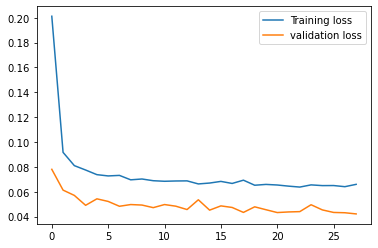

In [142]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()

In [223]:
n_future=90
forecast_period_dates=pd.date_range(list(train_dates)[-1], periods=n_future,freq='1H')

In [224]:
forecast_period_dates


DatetimeIndex(['2010-12-31 23:00:00', '2011-01-01 00:00:00',
               '2011-01-01 01:00:00', '2011-01-01 02:00:00',
               '2011-01-01 03:00:00', '2011-01-01 04:00:00',
               '2011-01-01 05:00:00', '2011-01-01 06:00:00',
               '2011-01-01 07:00:00', '2011-01-01 08:00:00',
               '2011-01-01 09:00:00', '2011-01-01 10:00:00',
               '2011-01-01 11:00:00', '2011-01-01 12:00:00',
               '2011-01-01 13:00:00', '2011-01-01 14:00:00',
               '2011-01-01 15:00:00', '2011-01-01 16:00:00',
               '2011-01-01 17:00:00', '2011-01-01 18:00:00',
               '2011-01-01 19:00:00', '2011-01-01 20:00:00',
               '2011-01-01 21:00:00', '2011-01-01 22:00:00',
               '2011-01-01 23:00:00', '2011-01-02 00:00:00',
               '2011-01-02 01:00:00', '2011-01-02 02:00:00',
               '2011-01-02 03:00:00', '2011-01-02 04:00:00',
               '2011-01-02 05:00:00', '2011-01-02 06:00:00',
               '2011-01-

In [226]:
list1=[]
for i in forecast_period_dates:
  list1.append(i.strftime("%Y-%m-%d %H:%M"))
list1

['2010-12-31 23:00',
 '2011-01-01 00:00',
 '2011-01-01 01:00',
 '2011-01-01 02:00',
 '2011-01-01 03:00',
 '2011-01-01 04:00',
 '2011-01-01 05:00',
 '2011-01-01 06:00',
 '2011-01-01 07:00',
 '2011-01-01 08:00',
 '2011-01-01 09:00',
 '2011-01-01 10:00',
 '2011-01-01 11:00',
 '2011-01-01 12:00',
 '2011-01-01 13:00',
 '2011-01-01 14:00',
 '2011-01-01 15:00',
 '2011-01-01 16:00',
 '2011-01-01 17:00',
 '2011-01-01 18:00',
 '2011-01-01 19:00',
 '2011-01-01 20:00',
 '2011-01-01 21:00',
 '2011-01-01 22:00',
 '2011-01-01 23:00',
 '2011-01-02 00:00',
 '2011-01-02 01:00',
 '2011-01-02 02:00',
 '2011-01-02 03:00',
 '2011-01-02 04:00',
 '2011-01-02 05:00',
 '2011-01-02 06:00',
 '2011-01-02 07:00',
 '2011-01-02 08:00',
 '2011-01-02 09:00',
 '2011-01-02 10:00',
 '2011-01-02 11:00',
 '2011-01-02 12:00',
 '2011-01-02 13:00',
 '2011-01-02 14:00',
 '2011-01-02 15:00',
 '2011-01-02 16:00',
 '2011-01-02 17:00',
 '2011-01-02 18:00',
 '2011-01-02 19:00',
 '2011-01-02 20:00',
 '2011-01-02 21:00',
 '2011-01-02 

In [237]:
forecast=model.predict(trainX[:90])

In [238]:
forecast


array([[ 0.19210342],
       [ 0.093894  ],
       [ 0.34139743],
       [ 0.56076944],
       [ 1.0263996 ],
       [ 1.1450219 ],
       [ 1.0721002 ],
       [ 0.7553194 ],
       [ 0.6953606 ],
       [ 0.11300042],
       [-0.32307243],
       [-0.8019338 ],
       [-1.1908705 ],
       [-1.319632  ],
       [-1.5849124 ],
       [-1.5405093 ],
       [-1.5726343 ],
       [-1.3152549 ],
       [-0.94792795],
       [-0.8011736 ],
       [-0.53141993],
       [-0.27886483],
       [-0.02260563],
       [ 0.3312268 ],
       [ 0.4658926 ],
       [ 0.5755065 ],
       [ 0.80226904],
       [ 0.8746874 ],
       [ 0.9239423 ],
       [ 0.44390586],
       [ 0.6901221 ],
       [ 0.38780597],
       [ 0.00407765],
       [-0.36493292],
       [-0.60698205],
       [-0.9545745 ],
       [-1.0604305 ],
       [-1.484893  ],
       [-1.7119025 ],
       [-1.6800851 ],
       [-1.5750549 ],
       [-1.2446216 ],
       [-1.2759894 ],
       [-1.1502364 ],
       [-0.5576234 ],
       [-0

In [239]:

forecast_copies=np.repeat(forecast,1,axis=1)

In [240]:
y_predict_future=scaler.inverse_transform(forecast_copies)[:,0]

In [280]:
y_predict_future

array([682107.1  , 650068.56 , 730810.9  , 802375.94 , 954277.   ,
       992974.8  , 969185.8  , 865843.4  , 846283.2  , 656301.56 ,
       514042.88 , 357825.38 , 230943.72 , 188938.25 , 102396.62 ,
       116882.12 , 106402.086, 190366.19 , 310198.16 , 358073.38 ,
       446074.28 , 528464.56 , 612063.25 , 727492.94 , 771424.56 ,
       807183.56 , 881159.6  , 904784.44 , 920852.7  , 764251.9  ,
       844574.25 , 745950.56 , 620768.06 , 500386.84 , 421423.88 ,
       308029.84 , 273496.78 , 135025.69 ,  60969.06 ,  71348.74 ,
       105612.43 , 213408.66 , 203175.66 , 244199.69 , 437526.03 ,
       445848.5  , 602015.7  , 598994.8  , 690293.75 , 714519.   ,
       702354.9  , 659128.75 , 683985.8  , 573758.56 , 502692.25 ,
       424241.1  , 314472.   , 266502.5  , 212076.16 , 221325.75 ,
       125128.74 , 116057.02 ,  98686.4  , 110254.27 , 139595.78 ,
       193171.22 , 188007.88 , 303585.62 , 364451.22 , 396160.88 ,
       450163.84 , 535165.2  , 485651.6  , 482191.6  , 592195.

In [242]:
df1=pd.DataFrame({'forecast_period_dates':list1,'power_predicted':y_predict_future })

In [243]:
df1

,forecast_period_dates,power_predicted
0,2010-12-31 23:00,682107.125000
1,2011-01-01 00:00,650068.562500
2,2011-01-01 01:00,730810.875000
3,2011-01-01 02:00,802375.937500
4,2011-01-01 03:00,954277.000000
...,...,...
85,2011-01-04 12:00,180473.343750
86,2011-01-04 13:00,147947.750000
87,2011-01-04 14:00,115647.148438
88,2011-01-04 15:00,113122.460938


Text(0.5, 1.0, 'Energy consumption vs Time')

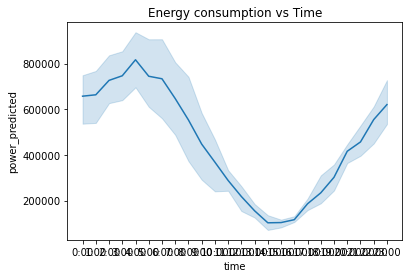

In [244]:
fig=plt.figure()
ax1=fig.add_subplot(111)
sns.lineplot(x=df["time"], y=df1["power_predicted"], data=df1)
plt.title("Energy consumption vs Time")

In [264]:
dict = {'Day':[],
        'Month':[],
        'Year':[],
        'time':[],
       }
df_new = pd.DataFrame(dict)
i=0
while(i<90):
    date,time=df1['forecast_period_dates'][i].split()
    year,month, date =date.split('-')
    df_new.loc[i]=[date,month,year,time]
    i+=1

In [266]:
df_new['power_predicted']=df1['power_predicted']
df_new['forecast_period_dates']=df1['forecast_period_dates']
df_new
df_new

,Day,Month,Year,time,power_predicted,forecast_period_dates
0,31,12,2010,23:00,682107.125000,2010-12-31 23:00
1,01,01,2011,00:00,650068.562500,2011-01-01 00:00
2,01,01,2011,01:00,730810.875000,2011-01-01 01:00
3,01,01,2011,02:00,802375.937500,2011-01-01 02:00
4,01,01,2011,03:00,954277.000000,2011-01-01 03:00
...,...,...,...,...,...,...
85,04,01,2011,12:00,180473.343750,2011-01-04 12:00
86,04,01,2011,13:00,147947.750000,2011-01-04 13:00
87,04,01,2011,14:00,115647.148438,2011-01-04 14:00
88,04,01,2011,15:00,113122.460938,2011-01-04 15:00


Text(0.5, 1.0, 'Energy Consumption in W')

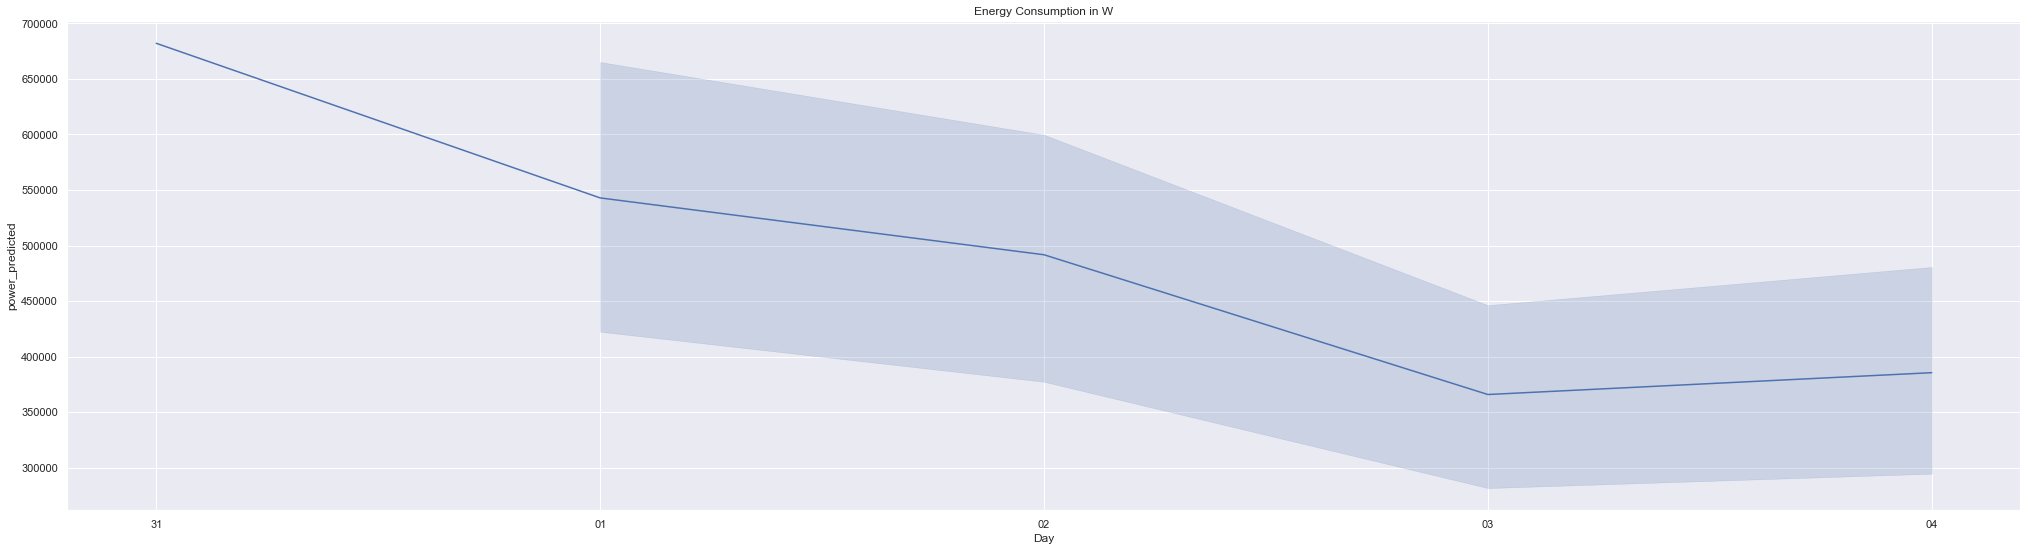

In [275]:
from matplotlib import style 
fig=plt.figure()
ax1=plt.subplot2grid((1,1),(0,0))
style.use('ggplot')
sns.lineplot(x=df_new["Day"], y=df_new["power_predicted"],data=df_new)
sns.set(rc={'figure.figsize':(35,9)})
plt.title("Energy Consumption in W")

C:\Users\msi1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Energy Distribution')

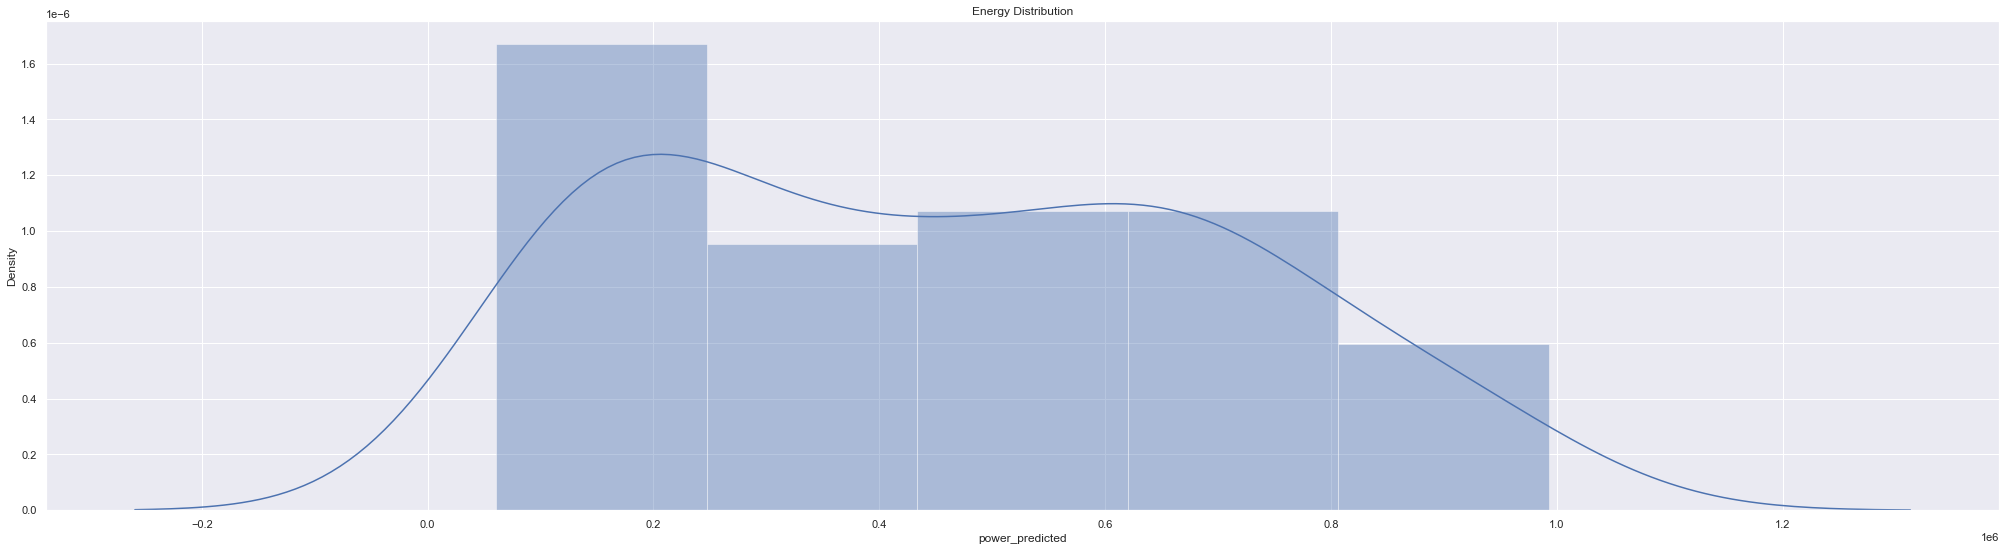

In [277]:
sns.distplot(df_new["power_predicted"])
plt.title("Energy Distribution")

<AxesSubplot:>

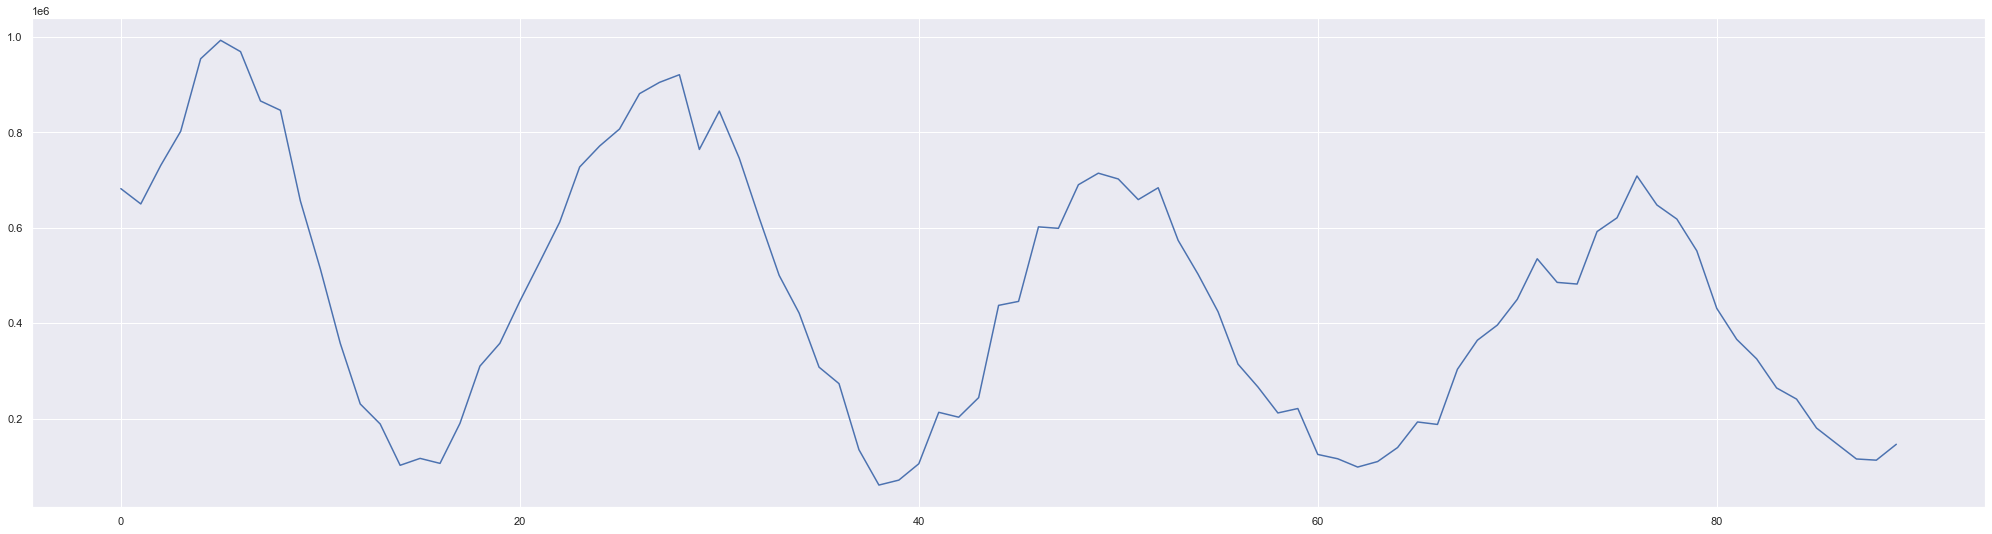

In [279]:
temp=df_new["power_predicted"]
temp.plot()